<a href="https://colab.research.google.com/github/Requenamar3/datawrangling/blob/main/Wrangling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Overview**

# New Section

**Objectives**

#**Dataset Description**

#**Structure Analisis**

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed.
#pandas will display all columns of the DataFrame in the output rather than truncating the middle columns (the ... in the middle)
pd.set_option('display.max_columns', None)

# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

1.25.2
1.2.2


In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b905f53f17c992919acb68c22f7d868e93d6392aa5a4c614956fd42bff2bfc18
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's depende

In [ ]:
import zipfile
import urllib.request
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
from pandas_profiling import ProfileReport
from datetime import datetime
zip_file, _ = urllib.request.urlretrieve('https://github.com/luis534a/data/raw/main/Crash_Reporting_-_Drivers_Data.zip')
zip_file_object = zipfile.ZipFile(zip_file)
CarCrash = pd.read_csv(zip_file_object.open(zip_file_object.namelist()[0]))

CarCrash.head()


<ipython-input-23-53ac607b487b>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
<ipython-input-23-53ac607b487b>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  CarCrash = pd.read_csv(zip_file_object.open(zip_file_object.namelist()[0]))


Report Number Local Case Number                Agency Name  \
0   MCP3170003V         240000438   Montgomery County Police   
1   MCP3254003K         230072050   Montgomery County Police   
2    EJ7887003Q         230074270  Gaithersburg Police Depar   
3   MCP2674004J         230064598   Montgomery County Police   
4   MCP25280008         230067019   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  01/03/2024 02:55:00 PM               NaN   
1           Injury Crash  12/16/2023 12:36:00 PM  Maryland (State)   
2           Injury Crash  12/29/2023 12:00:00 PM  Maryland (State)   
3  Property Damage Crash  11/05/2023 09:07:00 PM  Maryland (State)   
4  Property Damage Crash  11/18/2023 12:40:00 AM  Maryland (State)   

          Road Name Cross-Street Type Cross-Street Name  \
0               NaN               NaN               NaN   
1     GERMANTOWN RD            County    MIDDLEBROOK RD   
2  GREAT SENECA HWY      Municipality    KENTLANDS BLVD   
3      WOODFIELD RD            County    GLENDALOUGH RD   
4     CLARKSBURG RD  Maryland (State)     CLARKSBURG RD   

            Off-Road Description  Municipality Related Non-Motorist  \
0  IN FRONT OF 18900 BIRDSEYE DR           NaN                  NaN   
1                            NaN           NaN            BICYCLIST   
2                            NaN  GAITHERSBURG                  NaN   
3                            NaN           NaN                  NaN   
4                            NaN           NaN                  NaN   

                 Collision Type  Weather Surface Condition           Light  \
0  OPPOSITE DIRECTION SIDESWIPE   CLOUDY               NaN        DAYLIGHT   
1       STRAIGHT MOVEMENT ANGLE    CLEAR               DRY        DAYLIGHT   
2             SAME DIR REAR END    CLEAR               DRY        DAYLIGHT   
3                SINGLE VEHICLE    CLEAR               DRY  DARK LIGHTS ON   
4                SINGLE VEHICLE  RAINING               WET  DARK LIGHTS ON   

  Traffic Control Driver Substance Abuse Non-Motorist Substance Abuse  \
0     NO CONTROLS          NONE DETECTED                          NaN   
1  TRAFFIC SIGNAL          NONE DETECTED                NONE DETECTED   
2  TRAFFIC SIGNAL          NONE DETECTED                          NaN   
3     NO CONTROLS          NONE DETECTED                          NaN   
4      YIELD SIGN          NONE DETECTED                          NaN   

                              Person ID Driver At Fault  \
0  ACC015E9-08A4-4856-866E-0004005F986C             Yes   
1  76C65B60-90BF-4706-B78A-D277E9DC2E44              No   
2  B27B0A06-056C-4963-BCE7-2AE19BAD7061              No   
3  59A2A81B-B4F7-4FCE-B8C4-A2EC656A177D              No   
4  BACFA4BA-C75D-46A4-A181-1B4C0C3F8592             Yes   

          Injury Severity     Circumstance    Driver Distracted By  \
0      NO APPARENT INJURY              NaN  LOOKED BUT DID NOT SEE   
1      NO APPARENT INJURY              NaN          NOT DISTRACTED   
2  SUSPECTED MINOR INJURY              NaN          NOT DISTRACTED   
3      NO APPARENT INJURY      ANIMAL, N/A          NOT DISTRACTED   
4      NO APPARENT INJURY  RAIN, SNOW, WET          NOT DISTRACTED   

  Drivers License State                            Vehicle ID  \
0                    MD  4E492574-893B-4EB1-ADCA-53FDD633D6C4   
1                    MD  6D16232C-4E1E-49A6-B3A2-7FDEF7E506F2   
2                    MD  82ED056D-33FA-44A5-AA2B-8DCE653FA03C   
3                    MD  3CD099CA-F5FF-4174-B184-02BCF2C89934   
4                    MD  64940511-7ACF-4F66-9A1B-5F476A46C2A5   

  Vehicle Damage Extent Vehicle First Impact Location  \
0            FUNCTIONAL                  SEVEN OCLOCK   
1            FUNCTIONAL                 ELEVEN OCLOCK   
2            FUNCTIONAL                    SIX OCLOCK   
3            FUNCTIONAL                    ONE OCLOCK   
4             DISABLING                 ELEVEN OCLOCK 

In [ ]:
CarCrash.nunique().sort_values()

Parked Vehicle                         2
Driverless Vehicle                     2
Driver At Fault                        3
ACRS Report Type                       3
Injury Severity                        5
Vehicle Going Dir                      5
Vehicle Continuing Dir                 5
Vehicle Damage Extent                  7
Light                                  8
Cross-Street Type                     10
Agency Name                           10
Equipment Problems                    10
Route Type                            10
Traffic Control                       11
Surface Condition                     11
Driver Substance Abuse                11
Related Non-Motorist                  12
Weather                               12
Non-Motorist Substance Abuse          15
Vehicle Second Impact Location        16
Speed Limit                           16
Vehicle First Impact Location         16
Collision Type                        18
Driver Distracted By                  19
Municipality    

In [ ]:
CarCrash['Driver At Fault'].value_counts()

Yes        87779
No         73896
Unknown     4474
Name: Driver At Fault, dtype: int64

In [ ]:
#transposed sample of dataset, with each column representing an individual car crash incident
CarCrash.sample(4).T

117913  \
Report Number                                            MCP3008001W   
Local Case Number                                          190009788   
Agency Name                                 Montgomery County Police   
ACRS Report Type                               Property Damage Crash   
Crash Date/Time                               03/02/2019 04:30:00 AM   
Route Type                                          Maryland (State)   
Road Name                                            PINEY BRANCH RD   
Cross-Street Type                                   Maryland (State)   
Cross-Street Name                                  UNIVERSITY BLVD E   
Off-Road Description                                             NaN   
Municipality                                                     NaN   
Related Non-Motorist                                             NaN   
Collision Type                                     SAME DIR REAR END   
Weather                                                      RAINING   
Surface Condition                                                WET   
Light                                                 DARK LIGHTS ON   
Traffic Control                                       TRAFFIC SIGNAL   
Driver Substance Abuse                                 NONE DETECTED   
Non-Motorist Substance Abuse                                     NaN   
Person ID                       71E02A85-7B36-45A2-9834-ACE490629948   
Driver At Fault                                                   No   
Injury Severity                                   NO APPARENT INJURY   
Circumstance                                                     NaN   
Driver Distracted By                                  NOT DISTRACTED   
Drivers License State                                             MD   
Vehicle ID                      72765BF2-1843-447C-A1D5-0315A1254DD6   
Vehicle Damage Extent                                    SUPERFICIAL   
Vehicle First Impact Location                             SIX OCLOCK   
Vehicle Second Impact Location                            SIX OCLOCK   
Vehicle Body Type                                      PASSENGER CAR   
Vehicle Movement                             STOPPED IN TRAFFIC LANE   
Vehicle Continuing Dir                                         North   
Vehicle Going Dir                                              North   
Speed Limit                                                       35   
Driverless Vehicle                                                No   
Parked Vehicle                                                    No   
Vehicle Year                                                    2014   
Vehicle Make                                                    HOND   
Vehicle Model                                                     4S   
Equipment Problems                                         NO MISUSE   
Latitude                                                     38.9996   
Longitude                                                 -76.996112   
Location                                     (38.9996, -76.99611167)   

                                                              10291   \
Report Number                                            MCP29360057   
Local Case Number                                          220013735   
Agency Name                                 Montgomery County Police   
ACRS Report Type                               Property Damage Crash   
Crash Date/Time                               03/25/2022 07:00:00 PM   
Route Type                                          Maryland (State)   
Road Name                                                   RIVER RD   
Cross-Street Type                                   Maryland (State)   
Cross-Street Name                                          WILSON LA   
Off-Road Description                                             NaN   
Municipality                                                     NaN   
Related Non-Motorist         

In [ ]:
# CarCrash['Crash Date/Time']=CarCrash['Crash Date/Time'].apply(pd.to_datetime)
# CarCrash.info()

#**Quality Analisis**

##Dropping unused columns

In [ ]:
# List of columns to keep
columns_to_keep = ['Report Number', 'Local Case Number', 'ACRS Report Type', 'Crash Date/Time',
                  'Person ID',
                   'Driver At Fault', 'Injury Severity', 'Vehicle ID',
                   'Speed Limit', 'Vehicle Year','Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude']

# Determine which columns to remove
columns_to_remove = CarCrash.columns.difference(columns_to_keep)

# Create a new DataFrame with the unused columns
unused_columns = CarCrash[columns_to_remove].copy()

# Remove the columns from the original DataFrame
CarCrash = CarCrash.drop(columns=columns_to_remove)

# Verify the columns have been removed
CarCrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report Number      172105 non-null  object 
 1   Local Case Number  172105 non-null  object 
 2   ACRS Report Type   172105 non-null  object 
 3   Crash Date/Time    172105 non-null  object 
 4   Person ID          172105 non-null  object 
 5   Driver At Fault    172105 non-null  object 
 6   Injury Severity    172105 non-null  object 
 7   Vehicle ID         172105 non-null  object 
 8   Speed Limit        172105 non-null  int64  
 9   Vehicle Year       172105 non-null  int64  
 10  Vehicle Make       172081 non-null  object 
 11  Vehicle Model      172039 non-null  object 
 12  Latitude           172105 non-null  float64
 13  Longitude          172105 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 18.4+ MB


In [ ]:
# Select only the desired columns for profiling
profiled_data = CarCrash[columns_to_keep]

# Create the profile report
profile = ProfileReport(profiled_data, title='CarCrash Profiling Report', explorative=True)

# To display the report inside a Jupyter notebook, use the following command:
profile.to_notebook_iframe()

# To save the report to a file, you can use:
profile.to_file("your_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Count the unique values
# This includes counting NaN values because 'dropna' is set to False.
CarCrash['Crash Date/Time'].value_counts(dropna=False)

12/10/2018 06:10:00 PM    11
03/03/2017 06:00:00 AM    10
06/09/2020 06:53:00 PM    10
03/28/2019 09:30:00 AM    10
05/02/2017 06:12:00 PM     9
                          ..
02/15/2023 10:05:00 AM     1
08/06/2015 10:45:00 AM     1
09/13/2015 04:25:00 PM     1
10/19/2017 10:45:00 AM     1
12/15/2022 09:00:00 AM     1
Name: Crash Date/Time, Length: 94499, dtype: int64

##Splitting  Crash Date/Time into multiple columns using Lambda funtion

In [ ]:

# check 'Crash Date/Time' is in datetime format
CarCrash['Crash Date/Time'] = pd.to_datetime(CarCrash['Crash Date/Time'])

# Separate into 'date' and 'time' columns using lambda
CarCrash['date'] = CarCrash['Crash Date/Time'].apply(lambda x: x.date())
CarCrash['time'] = CarCrash['Crash Date/Time'].apply(lambda x: x.time())

# Extract the month and day using lambda
CarCrash['month'] = CarCrash['Crash Date/Time'].apply(lambda x: x.month)
CarCrash['day'] = CarCrash['Crash Date/Time'].apply(lambda x: x.day)

# Extract the hour in 24-hour format using lambda
CarCrash['hour'] = CarCrash['Crash Date/Time'].apply(lambda x: x.hour)

# For 12-hour format and AM/PM indicator, we use strftime within a lambda
CarCrash['hour_12'] = CarCrash['Crash Date/Time'].apply(lambda x: x.strftime('%I')).astype(int)  # 12-hour as integer
CarCrash['am_pm'] = CarCrash['Crash Date/Time'].apply(lambda x: x.strftime('%p'))  # AM/PM indicator


In [ ]:
CarCrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Report Number      172105 non-null  object        
 1   Local Case Number  172105 non-null  object        
 2   ACRS Report Type   172105 non-null  object        
 3   Crash Date/Time    172105 non-null  datetime64[ns]
 4   Person ID          172105 non-null  object        
 5   Driver At Fault    172105 non-null  object        
 6   Injury Severity    172105 non-null  object        
 7   Vehicle ID         172105 non-null  object        
 8   Speed Limit        172105 non-null  int64         
 9   Vehicle Year       172105 non-null  int64         
 10  Vehicle Make       172081 non-null  object        
 11  Vehicle Model      172039 non-null  object        
 12  Latitude           172105 non-null  float64       
 13  Longitude          172105 non-null  float64 

In [ ]:
CarCrash.sample(5)

Report Number Local Case Number       ACRS Report Type  \
131487   MCP1453004M         170529343           Injury Crash   
100497    DM8453000Y         170528129  Property Damage Crash   
122044   MCP26800038         190050587  Property Damage Crash   
119258   MCP2436008G         190045511  Property Damage Crash   
134537    HA22990001          15000142  Property Damage Crash   

           Crash Date/Time                             Person ID  \
131487 2017-09-08 07:55:00  B2B376E6-AFC6-40DA-97E7-B1D581C2AFFD   
100497 2017-09-01 10:20:00  2E4060F6-43A9-4920-BB25-5519B3A93958   
122044 2019-10-21 23:00:00  CBACFA38-FB6A-4FEE-9534-E2F420066B3C   
119258 2019-09-23 06:40:00  3A84D227-B38B-471A-B448-0A8341EFBE6B   
134537 2015-02-25 15:31:00  1E9A763C-BB5E-4695-B9E9-299ACE4B5B74   

       Driver At Fault     Injury Severity  \
131487              No  NO APPARENT INJURY   
100497             Yes  NO APPARENT INJURY   
122044             Yes  NO APPARENT INJURY   
119258              No  NO APPARENT INJURY   
134537             Yes  NO APPARENT INJURY   

                                  Vehicle ID  Speed Limit  Vehicle Year  \
131487  71ED6379-E2EC-4C21-BB35-7C2620CACBF9           40          2016   
100497  D82E28AE-21C2-4F82-9DDE-6668211CC634            5             0   
122044  88CA9BD9-5681-417E-B2C7-5A06309AA4EE           35          2002   
119258  FF8DF626-1A4F-4804-A07E-F27F0D8C2750           30          2011   
134537  5C7D5031-AFE5-4DFF-AE1E-271126F3704B           35          2015   

       Vehicle Make Vehicle Model   Latitude  Longitude        date      time  \
131487         JEEP            TK  39.179245 -77.267865  2017-09-08  07:55:00   
100497      UNKNOWN       UNKNOWN  38.991422 -76.993845  2017-09-01  10:20:00   
122044       NISSAN        SENTRA  39.122560 -77.177234  2019-10-21  23:00:00   
119258        HONDA         CIVIC  39.023442 -77.029045  2019-09-23  06:40:00   
134537         FORD          F350  39.214649 -77.272307  2015-02-25  15:31:00   

        month  day  hour  hour_12 am_pm  
131487      9    8     7        7    AM  
100497      9    1    10       10    AM  
122044     10   21    23       11    PM  
119258      9   23     6        6    AM  
134537      2   25    15        3    PM

##Numerical Features.

<Figure size 1500x400 with 0 Axes>

<ipython-input-14-f5e8f850f001>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'month'),
 Text(1, 0, 'hour_12'),
 Text(2, 0, 'Speed Limit'),
 Text(3, 0, 'hour'),
 Text(4, 0, 'day'),
 Text(5, 0, 'Vehicle Year'),
 Text(6, 0, 'Latitude'),
 Text(7, 0, 'Longitude')]

Text(0.5, 1.0, 'Unique values per frequency')

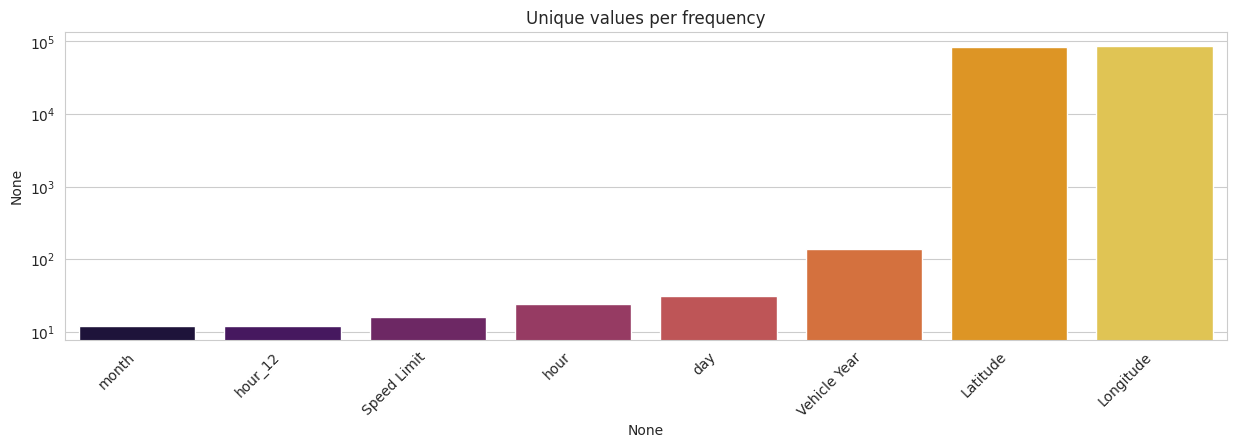

In [ ]:
# Evaluation of Numeric Features
# 2 unique values: binary
# 3 to ~ 10 unique values: ordinal (cat)
# 10+ unique values continuous
 # For each numerical feature compute number of unique entries
unique_values = CarCrash.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

In [ ]:
CarCrash.describe()

Speed Limit   Vehicle Year       Latitude      Longitude  \
count  172105.000000  172105.000000  172105.000000  172105.000000   
mean       32.549752    1966.306946      39.083119     -77.112343   
std        11.059987     340.615468       0.072032       0.098571   
min         0.000000       0.000000      37.720000     -79.486000   
25%        25.000000    2006.000000      39.024417     -77.189327   
50%        35.000000    2011.000000      39.074933     -77.105412   
75%        40.000000    2015.000000      39.139742     -77.039592   
max        75.000000    9999.000000      39.990414     -75.527708   

               month            day           hour        hour_12  
count  172105.000000  172105.000000  172105.000000  172105.000000  
mean        6.727509      15.709119      13.346416       6.448046  
std         3.469966       8.764330       5.264803       3.262132  
min         1.000000       1.000000       0.000000       1.000000  
25%         4.000000       8.000000       9.000000       4.000000  
50%         7.000000      16.000000      14.000000       6.000000  
75%        10.000000      23.000000      17.000000       9.000000  
max        12.000000      31.000000      23.000000      12.000000

## Dropping some NA rows

<Figure size 1500x800 with 0 Axes>

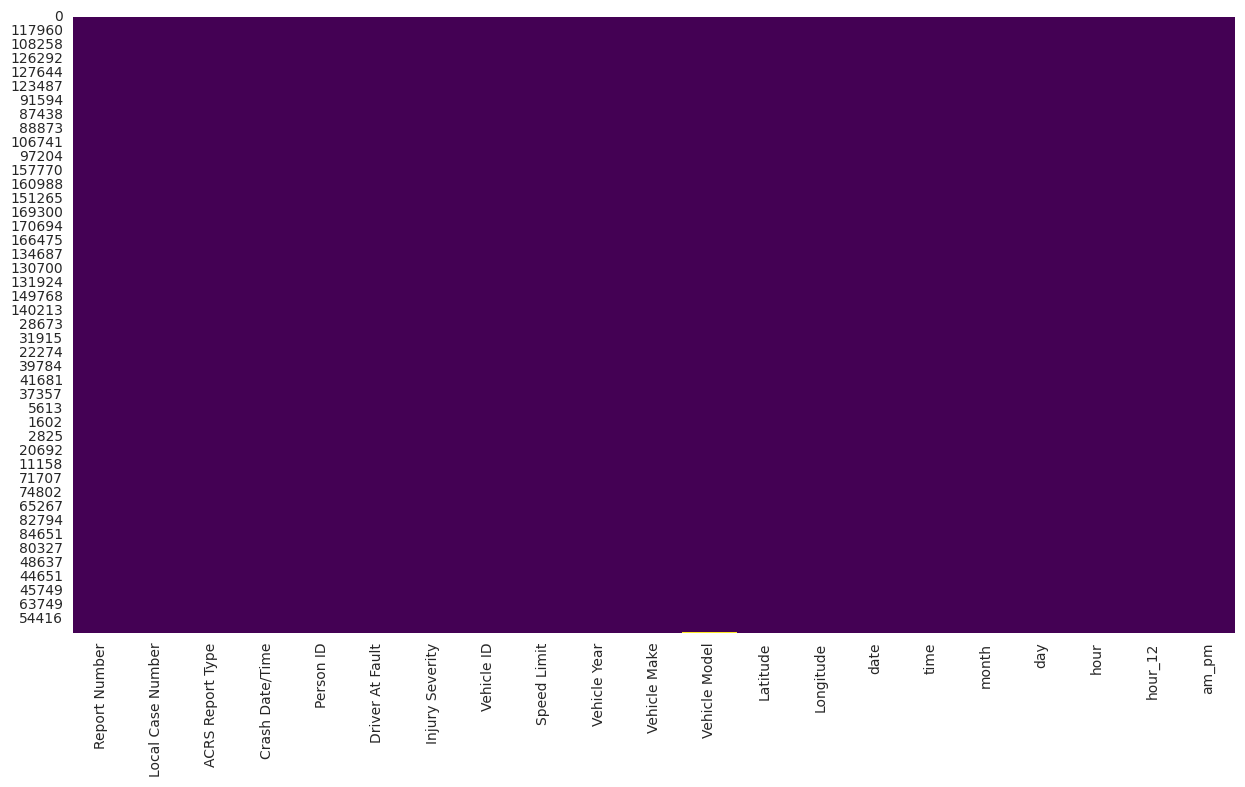

In [ ]:
# Missing Values (per sample/row)
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(CarCrash.loc[CarCrash.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')

In [ ]:
CarCrash.dropna(inplace=True)
CarCrash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172037 entries, 0 to 172104
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Report Number      172037 non-null  object        
 1   Local Case Number  172037 non-null  object        
 2   ACRS Report Type   172037 non-null  object        
 3   Crash Date/Time    172037 non-null  datetime64[ns]
 4   Person ID          172037 non-null  object        
 5   Driver At Fault    172037 non-null  object        
 6   Injury Severity    172037 non-null  object        
 7   Vehicle ID         172037 non-null  object        
 8   Speed Limit        172037 non-null  int64         
 9   Vehicle Year       172037 non-null  int64         
 10  Vehicle Make       172037 non-null  object        
 11  Vehicle Model      172037 non-null  object        
 12  Latitude           172037 non-null  float64       
 13  Longitude          172037 non-null  float64 

#Feature Selection

Injury Severity     0.820318
am_pm               0.646628
ACRS Report Type    0.635904
Driver At Fault     0.537222
Speed Limit         0.293257
dtype: float64

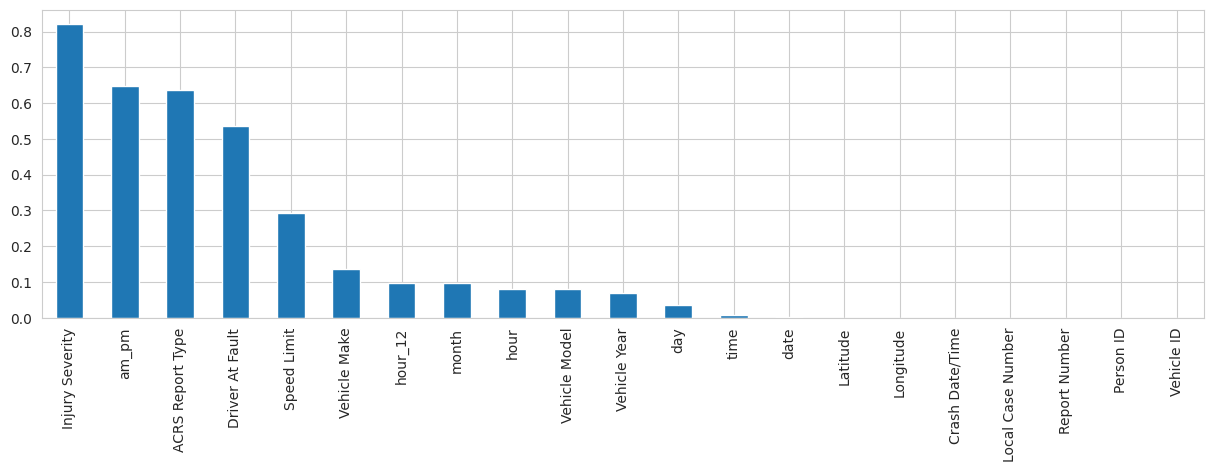

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = CarCrash.mode()
# Checks for each entry if it contains the most frequent entry
CarCrash_freq = CarCrash.eq(most_frequent_entry.values[0], axis=1)
# Computes the mean of the 'is_most_frequent' occurrence
CarCrash_freq = CarCrash_freq.mean().sort_values(ascending=False)
# Show the 5 top features with the highest ratio of singular value content
display(CarCrash_freq.head())
# Visualize the 'df_freq' table
CarCrash_freq.plot.bar(figsize=(15, 4));

## Map with all Crashes

In [ ]:
!pip install contextily

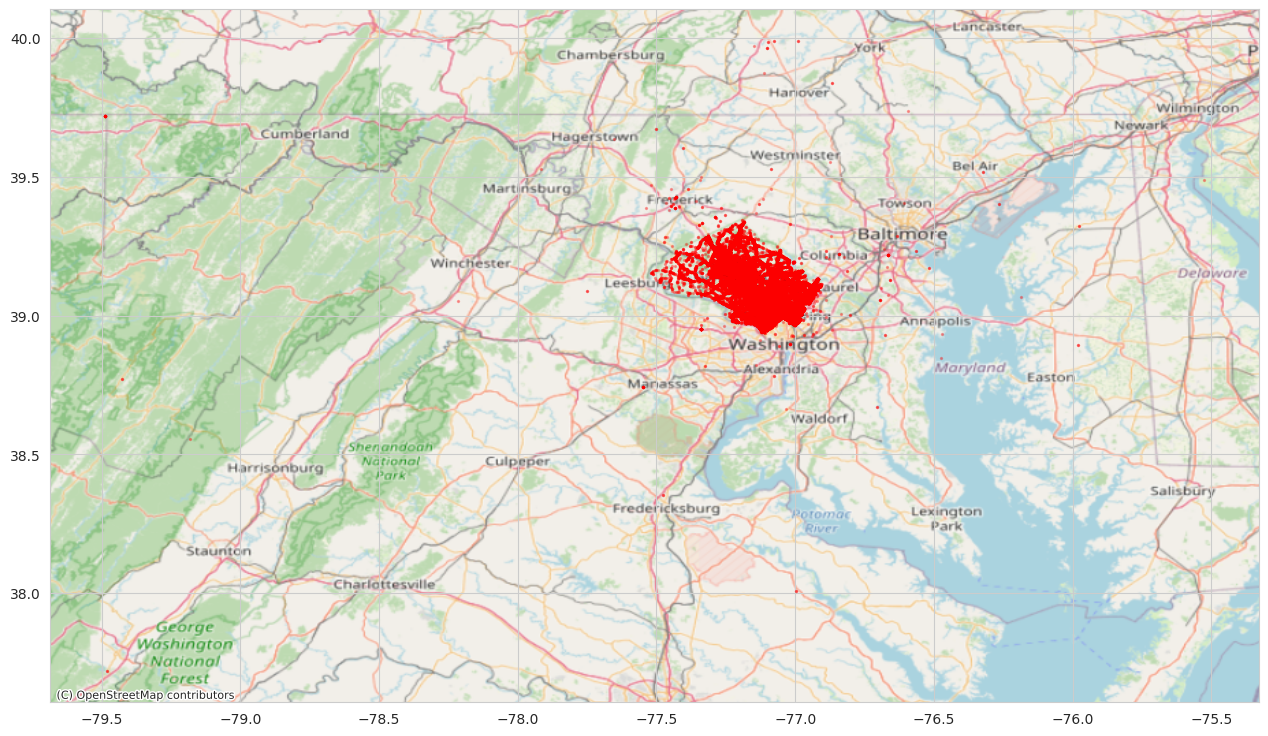

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Create a list of Point objects from latitude and longitude
geometry = [Point(lon, lat) for lon, lat in zip(CarCrash['Longitude'], CarCrash['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Plot the GeoDataFrame
ax = gdf.plot(color="red", figsize=(16, 9),alpha=0.3,markersize=2)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs.to_string())

# Outlier Treatment

<Axes: xlabel='Longitude'>

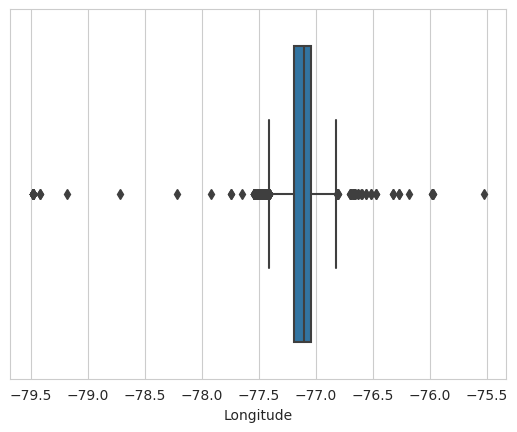

In [ ]:
# show the central tendency, the spread of the data,and outliers with boxplot
sns.boxplot(x=CarCrash['Longitude'])

# Display the plot.
plt.show()


sns.boxplot(x=CarCrash['Longitude'])
plt.show()

In [ ]:
# Calculate the first quartile (Q1) of the 'Longitude
Q1 = CarCrash['Longitude'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = CarCrash['Longitude'].quantile(0.75)

# Calculate the interquartile range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1

# Calculate the lower limit
lower_lim = Q1 - 1.5 * IQR

# Calculate the upper limit
upper_lim = Q3 + 1.5 * IQR

# Identify outliers that are below the lower limit
outlier_15_low = (CarCrash['Longitude'] < lower_lim)

# Identify outliers that are above the upper limit
outlier_15_up = (CarCrash['Longitude'] > upper_lim)


# Update the DataFrame by filtering out any outliers identified by the lower and upper limits
CarCrash = CarCrash[~(outlier_15_low | outlier_15_up)]

<Axes: xlabel='Longitude'>

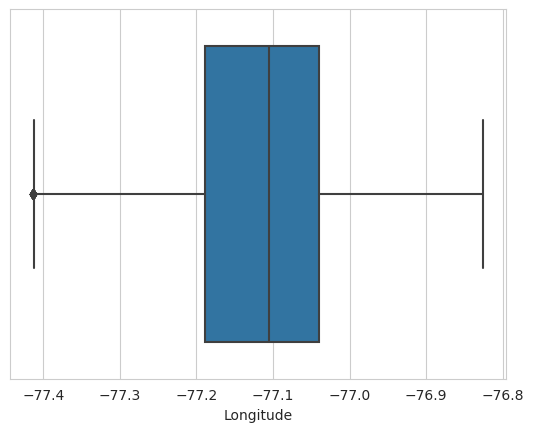

In [ ]:
sns.boxplot(x=CarCrash['Longitude'])
plt.show()

<Axes: xlabel='Latitude'>

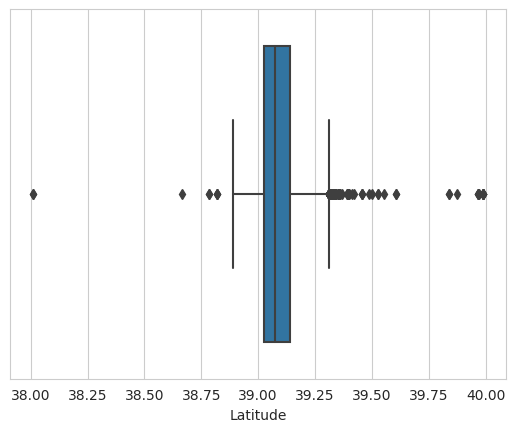

In [ ]:
sns.boxplot(x=CarCrash['Latitude'])
plt.show()

In [ ]:
Q1 = CarCrash['Latitude'].quantile(0.25)
Q3 = CarCrash['Latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outlier_15_low = (CarCrash['Latitude'] < lower_lim)
outlier_15_up = (CarCrash['Latitude'] > upper_lim)

CarCrash = CarCrash[~(outlier_15_low | outlier_15_up)]

<Axes: xlabel='Latitude'>

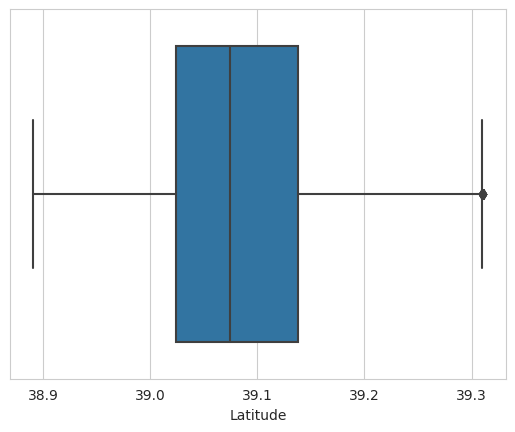

In [ ]:
sns.boxplot(x=CarCrash['Latitude'])
plt.show()

<Axes: xlabel='Vehicle Year'>

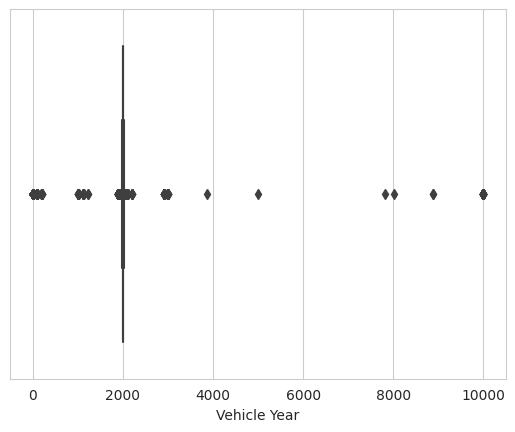

In [ ]:
sns.boxplot(x=CarCrash['Vehicle Year'])
plt.show()

In [ ]:
Q1 = CarCrash['Vehicle Year'].quantile(0.25)
Q3 = CarCrash['Vehicle Year'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

print(f'{lower_lim} - {upper_lim}')

1992.5 - 2028.5


In [ ]:
outlier_15_low = (CarCrash['Vehicle Year'] < lower_lim)
outlier_15_up = (CarCrash['Vehicle Year'] > upper_lim)

CarCrash = CarCrash[~(outlier_15_low | outlier_15_up)]

<Axes: xlabel='Vehicle Year'>

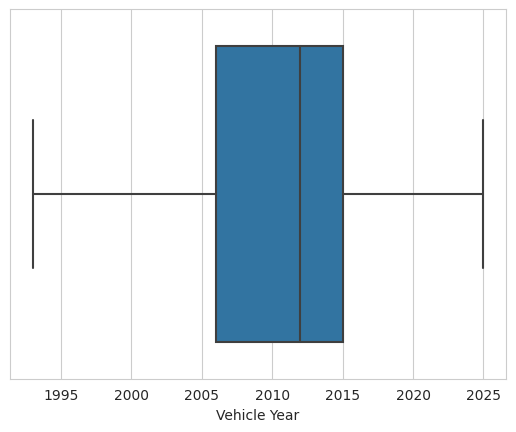

In [ ]:
sns.boxplot(x=CarCrash['Vehicle Year'])
plt.show()

# Adding Other Datasets

In [ ]:
zip_file, _ = urllib.request.urlretrieve('https://github.com/luis534a/data/raw/main/Crash_Reporting_-_Incidents_Data_20240217.zip ')
zip_file_object = zipfile.ZipFile(zip_file)
CrashIncident = pd.read_csv(zip_file_object.open(zip_file_object.namelist()[0]))
CrashIncident.head()

Report Number Local Case Number                Agency Name  \
0   MCP2686006F         230031339   Montgomery County Police   
1   MCP3230004G         230031335   Montgomery County Police   
2   MCP12600013         230031067   Montgomery County Police   
3    DD55750030         230031365  Rockville Police Departme   
4   MCP3010008B         230034141   Montgomery County Police   

        ACRS Report Type         Crash Date/Time Hit/Run  \
0  Property Damage Crash  06/30/2023 10:55:00 PM      No   
1  Property Damage Crash  06/30/2023 08:00:00 PM      No   
2           Injury Crash  06/29/2023 11:53:00 AM      No   
3  Property Damage Crash  07/01/2023 01:48:00 AM     Yes   
4  Property Damage Crash  07/01/2023 12:52:00 PM      No   

             Route Type  Mile Point Mile Point Direction Lane Direction  \
0                   NaN         NaN                  NaN            NaN   
1                County        1.42                 West          North   
2      Maryland (State)       11.26                North          North   
3          Municipality        0.07                North          North   
4  Other Public Roadway        0.00                 West           West   

   Lane Number Lane Type  Number of Lanes Direction  Distance Distance Unit  \
0            0       NaN                0       NaN       NaN           NaN   
1            1       NaN                2      West       0.0          FEET   
2            1       NaN                1     North      20.0          FEET   
3            1       NaN                1     South      20.0          FEET   
4            1       NaN                1      West      50.0          FEET   

  Road Grade NonTraffic       Road Name Cross-Street Type  \
0        NaN        Yes             NaN               NaN   
1      LEVEL         No      BEL PRE RD            County   
2      LEVEL         No  OLD HUNDRED RD              Ramp   
3      LEVEL         No  MEADOW HALL DR      Municipality   
4      LEVEL         No     LAKEVIEW DR            County   

                  Cross-Street Name        Off-Road Description Municipality  \
0                               NaN  DRIVEWAY OF 16121 COMUS RD          NaN   
1                   CONNECTICUT AVE                         NaN          NaN   
2  RAMP 6 FR MD 109 EB TO IS 270 SB                         NaN          NaN   
3                      MCAULIFFE DR                         NaN    ROCKVILLE   
4                       WESTLAKE DR                         NaN          NaN   

  Related Non-Motorist At Fault           Collision Type Weather  \
0                  NaN   DRIVER           SINGLE VEHICLE   CLEAR   
1                  NaN   DRIVER  STRAIGHT MOVEMENT ANGLE   CLEAR   
2                  NaN   DRIVER           SINGLE VEHICLE   CLEAR   
3                  NaN  UNKNOWN                    OTHER  CLOUDY   
4                  NaN   DRIVER        SAME DIR REAR END   CLEAR   

  Surface Condition           Light Traffic Control Driver Substance Abuse  \
0               NaN  DARK NO LIGHTS     NO CONTROLS          NONE DETECTED   
1               DRY        DAYLIGHT  TRAFFIC SIGNAL          NONE DETECTED   
2               DRY        DAYLIGHT       STOP SIGN          NONE DETECTED   
3               DRY  DARK LIGHTS ON             NaN                    NaN   
4               DRY        DAYLIGHT             NaN                    NaN   

  Non-Motorist Substance Abuse First Harmful Event Second Harmful Event  \
0                          NaN        FIXED OBJECT                  NaN   
1                          NaN       OTHER VEHICLE                  NaN   
2                          NaN        FIXED OBJECT         FIXED OBJECT   
3                          NaN      PARKED VEHICLE         FIXED OBJECT   
4                          NaN      PARKED VEHICLE                  NaN   

   Fixed Oject Struck          Junction      Intersection Type  \
0               OTHER               NaN                    NaN   
1                 NaN

In [ ]:
key_column = 'Report Number'
CrashIncident_add_columns = []
CrashIncident_add_columns.append(key_column)
for c in CrashIncident.columns:
  if c not in CarCrash.columns:
    CrashIncident_add_columns.append(c)
CrashIncident[CrashIncident_add_columns]

Report Number                Agency Name Hit/Run            Route Type  \
0       MCP2686006F   Montgomery County Police      No                   NaN   
1       MCP3230004G   Montgomery County Police      No                County   
2       MCP12600013   Montgomery County Police      No      Maryland (State)   
3        DD55750030  Rockville Police Departme     Yes          Municipality   
4       MCP3010008B   Montgomery County Police      No  Other Public Roadway   
...             ...                        ...     ...                   ...   
97453   MCP13660071   Montgomery County Police      No                County   
97454   MCP28270022   Montgomery County Police      No      Maryland (State)   
97455    HA2433001B  Maryland-National Capital      No                   NaN   
97456   MCP1128003R   Montgomery County Police      No      Maryland (State)   
97457   MCP2861004G   Montgomery County Police      No      Maryland (State)   

       Mile Point Mile Point Direction Lane Direction  Lane Number Lane Type  \
0             NaN                  NaN            NaN            0       NaN   
1            1.42                 West          North            1       NaN   
2           11.26                North          North            1       NaN   
3            0.07                North          North            1       NaN   
4            0.00                 West           West            1       NaN   
...           ...                  ...            ...          ...       ...   
97453        1.72                South          North            3       NaN   
97454        7.53                North          North            3       NaN   
97455         NaN                  NaN            NaN            0       NaN   
97456        2.83                North          North            1       NaN   
97457        3.51                North          South            3       NaN   

       Number of Lanes Direction  Distance Distance Unit Road Grade  \
0                    0       NaN       NaN           NaN        NaN   
1                    2      West       0.0          FEET      LEVEL   
2                    1     North      20.0          FEET      LEVEL   
3                    1     South      20.0          FEET      LEVEL   
4                    1      West      50.0          FEET      LEVEL   
...                ...       ...       ...           ...        ...   
97453                3     North      10.0          FEET      LEVEL   
97454                5     South      15.0          FEET      LEVEL   
97455                0       NaN       NaN           NaN        NaN   
97456                4     North       0.0          FEET      LEVEL   
97457                3     South      50.0          FEET      LEVEL   

      NonTraffic          Road Name Cross-Street Type  \
0            Yes                NaN               NaN   
1             No         BEL PRE RD            County   
2             No     OLD HUNDRED RD              Ramp   
3             No     MEADOW HALL DR      Municipality   
4             No        LAKEVIEW DR            County   
...          ...                ...               ...   
97453         No     TWINBROOK PKWY            County   
97454         No  NEW HAMPSHIRE AVE            County   
97455        Yes                NaN               NaN   
97456         No    CONNECTICUT AVE        Government   
97457         No  OLD GEORGETOWN RD            County   

                      Cross-Street Name  \
0                                   NaN   
1                       CONNECTICUT AVE   
2      RAMP 6 FR MD 109 EB TO IS 270 SB   
3                          MCAULIFFE DR   
4                           WESTLAKE DR   
...                                 ...   
97453                        FISHERS LA   
97454                     E RANDOLPH RD   
97455                               NaN   
97456                          BEACH DR   
97457                    ROCK SPRING DR   

                             

In [ ]:
CarCrash = CarCrash.merge(CrashIncident[CrashIncident_add_columns].set_index(key_column), on=key_column, validate='m:1')

# Binary Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
import zipfile
import urllib.request
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
from pandas_profiling import ProfileReport
from datetime import datetime
zip_file, _ = urllib.request.urlretrieve('https://github.com/luis534a/data/raw/main/Crash_Reporting_-_Drivers_Data.zip')
zip_file_object = zipfile.ZipFile(zip_file)
CarCrash_B = pd.read_csv(zip_file_object.open(zip_file_object.namelist()[0]))

CarCrash_B.head()

<ipython-input-4-7ff844288b09>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
<ipython-input-4-7ff844288b09>:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  CarCrash_B = pd.read_csv(zip_file_object.open(zip_file_object.namelist()[0]))


Report Number Local Case Number                Agency Name  \
0   MCP3170003V         240000438   Montgomery County Police   
1   MCP3254003K         230072050   Montgomery County Police   
2    EJ7887003Q         230074270  Gaithersburg Police Depar   
3   MCP2674004J         230064598   Montgomery County Police   
4   MCP25280008         230067019   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  01/03/2024 02:55:00 PM               NaN   
1           Injury Crash  12/16/2023 12:36:00 PM  Maryland (State)   
2           Injury Crash  12/29/2023 12:00:00 PM  Maryland (State)   
3  Property Damage Crash  11/05/2023 09:07:00 PM  Maryland (State)   
4  Property Damage Crash  11/18/2023 12:40:00 AM  Maryland (State)   

          Road Name Cross-Street Type Cross-Street Name  \
0               NaN               NaN               NaN   
1     GERMANTOWN RD            County    MIDDLEBROOK RD   
2  GREAT SENECA HWY      Municipality    KENTLANDS BLVD   
3      WOODFIELD RD            County    GLENDALOUGH RD   
4     CLARKSBURG RD  Maryland (State)     CLARKSBURG RD   

            Off-Road Description  ... Speed Limit Driverless Vehicle  \
0  IN FRONT OF 18900 BIRDSEYE DR  ...           0                 No   
1                            NaN  ...          35                 No   
2                            NaN  ...          35                 No   
3                            NaN  ...          40                 No   
4                            NaN  ...          20                 No   

  Parked Vehicle Vehicle Year Vehicle Make Vehicle Model Equipment Problems  \
0             No         2017        LEXUS           SUV          NO MISUSE   
1             No         2010         TOYT         PRIUS          NO MISUSE   
2             No         2021       SUBARU     FORRESTER          NO MISUSE   
3             No         2019        DODGE       CHARGER          NO MISUSE   
4             No         2014       NISSAN         ROGUE                NaN   

    Latitude  Longitude                     Location  
0  39.165005 -77.249310     (39.16500483, -77.24931)  
1  39.178776 -77.267190  (39.17877577, -77.26718974)  
2  39.123574 -77.231769    (39.12357374, -77.231769)  
3  39.211742 -77.171461  (39.21174219, -77.17146065)  
4  39.228915 -77.289091  (39.22891483, -77.28909117)  

[5 rows x 43 columns]

In [ ]:
CarCrash_B.fillna(0, inplace=True)

print(CarCrash_B.nunique())

Report Number                      96854
Local Case Number                 108783
Agency Name                           10
ACRS Report Type                       3
Crash Date/Time                    94499
Route Type                            11
Road Name                           3804
Cross-Street Type                     11
Cross-Street Name                   6698
Off-Road Description               11303
Municipality                          21
Related Non-Motorist                  13
Collision Type                        19
Weather                               13
Surface Condition                     12
Light                                  9
Traffic Control                       12
Driver Substance Abuse                12
Non-Motorist Substance Abuse          16
Person ID                         172105
Driver At Fault                        3
Injury Severity                        5
Circumstance                         199
Driver Distracted By                  19
Drivers License 

In [ ]:
# Filter the dataframe to only include rows where "Driver At Fault" is "Yes" or "No"
filtered_CarCrash = CarCrash_B[CarCrash_B['Driver At Fault'].isin(['Yes', 'No'])]

In [ ]:
unique_values = filtered_CarCrash['Driver At Fault'].unique()
print(unique_values)

['Yes' 'No']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the binary column
filtered_CarCrash['Driver At Fault'] = le.fit_transform(filtered_CarCrash['Driver At Fault'])

# Print the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'No': 0, 'Yes': 1}


<ipython-input-8-2d36436c9224>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_CarCrash['Driver At Fault'] = le.fit_transform(filtered_CarCrash['Driver At Fault'])


In [ ]:
X = filtered_CarCrash.drop(['Driver At Fault'], axis=1)
y = filtered_CarCrash['Driver At Fault']
X.head()

Report Number Local Case Number                Agency Name  \
0   MCP3170003V         240000438   Montgomery County Police   
1   MCP3254003K         230072050   Montgomery County Police   
2    EJ7887003Q         230074270  Gaithersburg Police Depar   
3   MCP2674004J         230064598   Montgomery County Police   
4   MCP25280008         230067019   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  01/03/2024 02:55:00 PM                 0   
1           Injury Crash  12/16/2023 12:36:00 PM  Maryland (State)   
2           Injury Crash  12/29/2023 12:00:00 PM  Maryland (State)   
3  Property Damage Crash  11/05/2023 09:07:00 PM  Maryland (State)   
4  Property Damage Crash  11/18/2023 12:40:00 AM  Maryland (State)   

          Road Name Cross-Street Type Cross-Street Name  \
0                 0                 0                 0   
1     GERMANTOWN RD            County    MIDDLEBROOK RD   
2  GREAT SENECA HWY      Municipality    KENTLANDS BLVD   
3      WOODFIELD RD            County    GLENDALOUGH RD   
4     CLARKSBURG RD  Maryland (State)     CLARKSBURG RD   

            Off-Road Description  ... Speed Limit Driverless Vehicle  \
0  IN FRONT OF 18900 BIRDSEYE DR  ...           0                 No   
1                              0  ...          35                 No   
2                              0  ...          35                 No   
3                              0  ...          40                 No   
4                              0  ...          20                 No   

  Parked Vehicle Vehicle Year Vehicle Make Vehicle Model Equipment Problems  \
0             No         2017        LEXUS           SUV          NO MISUSE   
1             No         2010         TOYT         PRIUS          NO MISUSE   
2             No         2021       SUBARU     FORRESTER          NO MISUSE   
3             No         2019        DODGE       CHARGER          NO MISUSE   
4             No         2014       NISSAN         ROGUE                  0   

    Latitude  Longitude                     Location  
0  39.165005 -77.249310     (39.16500483, -77.24931)  
1  39.178776 -77.267190  (39.17877577, -77.26718974)  
2  39.123574 -77.231769    (39.12357374, -77.231769)  
3  39.211742 -77.171461  (39.21174219, -77.17146065)  
4  39.228915 -77.289091  (39.22891483, -77.28909117)  

[5 rows x 42 columns]

In [ ]:
X = pd.get_dummies(X)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scoring metrics:
# 'accuracy', 'balanced_accuracy', 'average_precision', 'neg_brier_score', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
# 'neg_log_loss', 'precision', 'recall', 'jaccard', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted'
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print()

fig = pyplot.figure(figsize=(15, 10))  # Change the numbers as needed
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)  # Added rotation for better visibility
pyplot.show()